In [792]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [793]:
import math
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [794]:
cd "~/dropbox"

/Users/agrimabahl/Dropbox


In [795]:
training = scipy.io.loadmat('train.mat')

In [796]:
test=scipy.io.loadmat('test.mat')

In [797]:
newt=training["train_images"]

In [798]:
newt=newt.transpose()

In [799]:
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img



In [800]:
train_matrix=np.empty((60000,28,28))
for i in range(0,28):
    for j in range(0,28):
        for k in range(0,60000):
            train_matrix[k][j][i]=newt[k][i][j]

In [801]:
train_matrix.shape

(60000, 28, 28)

In [802]:
Ytrain=training["train_labels"]


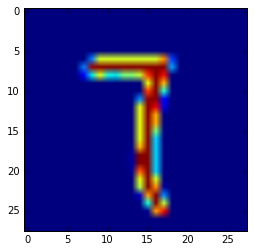

In [803]:
plt.imshow(train_matrix[45051])

In [804]:
train_before=train_matrix.reshape(60000,784)


In [808]:
train_matrix=train_before/255.0

In [809]:
train_matrix=np.insert(train_matrix, 784, values=1, axis=1)

In [812]:
from sklearn.utils import shuffle
train_matrix, Ymatrix = shuffle(train_matrix, Ymatrix, random_state=0)

In [813]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [878]:
#tanh(Vx)=h
#z=
class NeuralNetwork (object):
    def __init__(self):
        self.inpt=785
        self.output=10
        self.hidden=200
        random.seed([2,1])
        self.V=np.random.normal(0,0.01,[self.hidden,self.inpt])
        random.seed([1,2])
        self.W=np.random.normal(0,0.01,[self.output,self.hidden+1])
        
    def forwardprop(self,train,W,V):
        self.p1=train.dot(V.transpose())
        self.xj1=tanh(self.p1)
        self.xj1=np.insert(self.xj1, 200, values=1, axis=1)
        self.p2=self.xj1.dot(W.transpose())
        self.xj2=sigmoid(self.p2)
        return self.xj1,self.xj2
    
    def squared_loss(self,pred,Ytrain):
        self.loss=0.5*(Ytrain-pred)**2
        loss_matrix=np.zeros((len(Ytrain),1))
        loss_matrix=[sum(self.loss[i])for i in range(len(self.loss))]
        return (sum(loss_matrix))
    
    
    def dLdz(self,pred,Ytrain):
        return (pred-Ytrain)
    
    
    def backwardprop(self,X,Y,W,V):
        self.h,pred=self.forwardprop(X,W,V)
        delta3=np.multiply(self.dLdz(pred,Y),pred*(1-pred))
        dLdW=np.dot(self.h.transpose(),delta3)
        
        delta2=np.dot(delta3,W)*(1-self.h**2)
        dLdV=np.dot(X.transpose(),delta2)
        return dLdW,dLdV
    #def backward(self,Xtrain,Ytrain):
    
    def trainer(self,X,Y):
        Wi=self.W
        Vi=self.V
        return self.stochgradient(X,Y,Wi,Vi)
    
    def stochgradient(self,X,Y,W,V):
        eps = 0.000013
        xj1,pred=self.forwardprop(X,W,V)
        dLdW,dLdV=self.backwardprop(X,Y,W,V)
        risk_fn=[0]*1000
        for i in range(len(X)):
            xj1,pred=self.forwardprop(X,W,V)
            dLdW,dLdV=self.backwardprop(X,Y,W,V)
            if i%50==0:
                j=int(i/50)
                risk_fn[j]=self.squared_loss(pred,Y)
                print(risk_fn[j])
            W=W-eps*dLdW.transpose()
            V=V-eps*dLdV[:,:200].transpose()
        return W,V,risk_fn
        
        
    #def backprop 

In [879]:
new=NeuralNetwork()

In [880]:
xj1,pred=new.forwardprop(train_matrix[:50000],np.random.normal(0,0.01,[10,201]),np.random.normal(0,0.01,[200,785]))

In [761]:
dW,dV=new.backwardprop(train_matrix[:50000],Ymatrix[:50000],np.random.normal(0,0.01,[10,201]),np.random.normal(0,0.01,[200,785]))

In [15]:
Ytrain=np.zeros((len(training["train_labels"])))
for i in range(len(training["train_labels"])):
    Ytrain[i]=int(training["train_labels"][i])

In [ ]:
l=new.cross_entropy_loss(pred,Ymatrix[:50000])

In [97]:
train_labels=np.zeros((len(Ytrain),10))
24995.0246868

In [361]:
def dtanh(x):
    return 1-tanh(x)**2

In [172]:
def dsigmoid(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

In [ ]:
def Lmean_squared(ypred,ylabel):
    return 

In [817]:
import timeit
start_time = timeit.default_timer()

In [881]:
w2,v2,r2=new.trainer(train_matrix[:50000],Ymatrix[:50000])

62507.499776
21346.0462536
15367.3318235
11577.472317
9649.4772193
8300.01097198
7475.58974735
6938.89446388
6556.24505807
6261.83982687
6022.62094236
5820.55028449
5644.94327118
5489.05231172
5348.39678454
5219.86993693
5101.23010671
4990.80109492
4887.29295273
4789.69249636
4697.19323193
4609.14727521
4525.03015619
4444.4141453
4366.94789717


KeyboardInterrupt: 

In [ ]:
elapsed = timeit.default_timer() - start_time

In [868]:
xj1,pred=new.forwardprop(train_matrix[50000:],w2,v2)

In [ ]:
elapsed

In [213]:
xj1,pred=new.forwardprop(test_matrix,w,v)

In [829]:
y=np.zeros(10000)

In [810]:
Ymatrix=np.zeros((len(Ytrain),10))

In [811]:
for i in range(len(Ymatrix)):
    Ymatrix[i][int(Ytrain[i])]=1

In [56]:
pred=np.zeros((50000,10))

In [223]:
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate,indices

In [869]:
for i in range(len(pred)):
    pred_tuple[i]=np.argmax(pred[i])

In [146]:
pred_tuple=[0]*len(pred)

In [883]:
for i in range(len(Ymatrix[50000:])):
    y[i]=np.argmax(Ymatrix[50000+i])

IndexError: list assignment index out of range

In [618]:
len(Ymatrix)

60000

In [619]:
x=[1,2,3]

In [870]:
benchmark(np.array(pred_tuple),np.array(y))

(0.13650000000000001, (array([   9,   10,   27, ..., 9974, 9990, 9997]),))

In [705]:
type(y)

list

In [633]:
y[9999]

0

In [634]:
pred_tuple[9999]

0

In [39]:
test_matrix=test["test_images"]

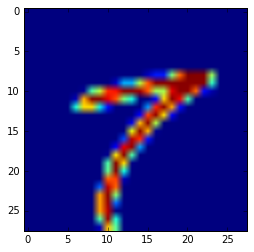

In [40]:
plt.imshow(test_matrix[100])

In [41]:
test_before=test_matrix.reshape(10000,784)



In [42]:
test_matrix=test_before/255.0

In [43]:
test_matrix=np.insert(test_matrix, 784, values=1, axis=1)

In [659]:
pred

array([[  3.67381105e-04,   9.14433118e-01,   2.17302599e-02, ...,
          1.52227865e-02,   5.11319116e-02,   4.14217413e-02],
       [  1.05073519e-02,   2.92691363e-04,   3.39151376e-02, ...,
          1.28784240e-04,   1.30743635e-03,   3.16949784e-03],
       [  2.02455047e-02,   1.19496776e-05,   7.45961706e-04, ...,
          4.73992924e-03,   4.63347905e-03,   5.66135526e-02],
       ..., 
       [  2.13292421e-04,   9.56228878e-03,   9.77970212e-01, ...,
          9.97501123e-04,   2.28287889e-02,   5.57891624e-03],
       [  4.95119748e-01,   3.37691066e-05,   6.91857401e-02, ...,
          5.41101509e-04,   1.98474557e-02,   3.23536998e-03],
       [  7.18967579e-03,   3.21356027e-03,   7.88287642e-02, ...,
          2.20376072e-02,   1.70753383e-02,   2.34997738e-01]])

In [189]:
for i in range(len(pred)):
    pred_tuple_test[i]=np.argmax(pred[i])

In [47]:
pred_tuple_test=[0]*len(pred)

In [190]:
numpy.savetxt("HW6-Agrima.csv", pred_tuple_test, delimiter=",")

In [50]:
pred_tuple_test[100]

7

In [82]:
for i in range(len(pred)):
            self.loss_matrix[i]=Ytrain2[i]*a1[i]+(1-Ytrain2[i])*a2[i]

1.0986122886681098

In [88]:
def cross_entropy_loss(self,pred,Ytrain):
        self.a1=log(pred)
        self.a2=log(1-pred)
        self.loss_matrix=np.zeros((len(Ytrain),1))
        for i in range(len(pred)):
            loss_matrix[i]=Ytrain[i].dot(a1)+(1-Ytrain[i]).dot(a2)
        return (sum(loss_matrix))    

In [352]:
a=np.array([1,2,34,5])

In [356]:
x=np.array([0.5,2,17,2])

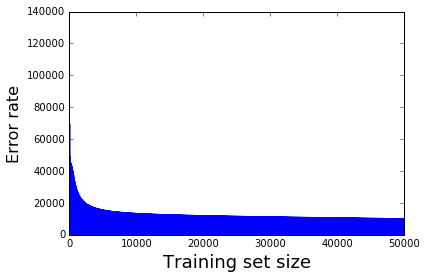

In [500]:
plt.plot(r)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Loss function', fontsize=16)

In [888]:
y=[1-0.93520000000000003,1-0.86339999999999995
,1-0.86709999999999998
,1-0.86280000000000001
,1-0.4793
,1-0.13650000000000001
,1-0.090399999999999994
,1-0.075
,1-0.036]
x=[100,200,500,1000,2000,5000,10000,20000,50000]                            

In [884]:
y=[12501.1983099,
4552.42126262,
4519.91388032,
4480.61226188,
4408.3859236,
4256.48883002,
4003.68743318,
3759.16826535,
3528.59205806,
3297.83245879,
3080.66525222,
2884.92947639,
2709.96811812,
2558.3865729,
2430.07513643,
2320.97132313,
2225.4573768,
2138.36679268,
2056.09725676,
1977.26568856,
1902.58000011,
1833.50332666,
1770.87252219,
1714.62277592,
1664.18855592,
1618.87397713,
1578.0207531,
1541.0521393,
1507.47087099,
1476.84714107,
1448.80787982,
1423.02896418,
1399.22941344,
1377.16654019,
1356.63149298,
1337.44501567,
1319.45344573,
1302.52503048,
1286.54662619,
1271.4208096,
1257.06339766,
1243.40134781,
1230.37099875,
1217.91660631,
1205.9891302,
1194.54523035,
1183.54643658,
1172.95846042,
1162.750623,
1152.89537727,
1143.36790717,
1134.14578926,
1125.20870568,
1116.538199,
1108.1174619,
1099.9311556,
1091.96525247,
1084.20689888,
1076.64429517,
1069.26659035,
1062.06378911,
1055.02666967,
1048.14671089,
1041.41602728,
1034.82731117,
1028.37378078,
1022.0491338,
1015.84750554,
1009.76343136,
1003.79181264,
997.927886127,
992.167196185,
986.505569619,
980.939092883,
975.464091373,
970.077110634,
964.774899266,
959.554393387,
954.412702474,
949.34709647,
944.354994013,
939.433951683,
934.581654157,
929.795905176,
925.074619237,
920.415813944,
915.817602925,
911.278189284,
906.795859514,
902.368977847,
897.995980991,
893.675373244,
889.405721949,
885.185653291,
881.013848405,
876.889039804,
872.810008104,
868.775579046,
864.784620792,
860.836041494,
856.928787116,
853.061839479,
849.234214533,
845.444960815,
841.693158074,
837.977916055,
834.298373396,
830.653696648,
827.043079366,
823.465741286,
819.920927547,
816.407907961,
812.925976315,
809.4744497,
806.052667846,
802.659992482,
799.295806693,
795.95951429,
792.650539175,
789.368324717,
786.11233312,
782.882044808,
779.676957795,
776.496587073,
773.340463998,
770.208135682,
767.099164396,
764.013126971,
760.949614221,
757.908230358,
754.888592435,
751.890329784,
748.913083472,
745.956505771,
743.020259624,
740.104018143,
737.207464099,
734.330289434,
731.472194776,
728.632888973,
725.812088626,
723.009517644,
720.224906795,
717.457993283,
714.708520323,
711.976236733,
709.260896534,
706.562258567,
703.880086117,
701.214146557,
698.564211003,
695.930053984,
693.311453138,
690.708188916,
688.120044314,
685.546804627,
682.988257222,
680.444191337,
677.914397916,
675.398669461,
672.896799923,
670.408584623,
667.93382021,
665.472304658,
663.023837297,
660.5882189,
658.165251802,
655.754740076,
653.356489762,
650.97030915,
648.59600912,
646.233403556,
643.882309824,
641.542549327,
639.213948143,
636.896337757,
634.589555888,
632.293447417,
630.007865431,
627.732672371,
625.467741279,
623.212957142,
620.968218286,
618.733437776,
616.508544768,
614.293485713,
612.088225298,
609.892747024,
607.707053266,
605.531164718,
603.365119113,
601.208969193,
599.062779928,
596.926625089,
594.800583336,
592.684734037,
590.579153096,
588.48390904,
586.399059627,
584.324649157]

In [886]:
x=range(1,50000,250)


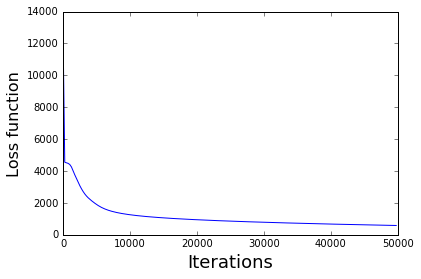

In [887]:
plt.plot(x,y)
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('Loss function', fontsize=16)

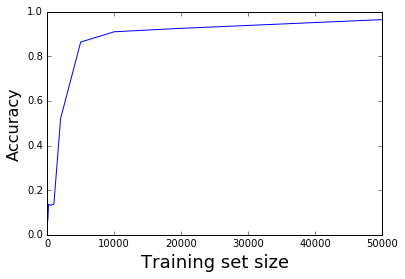

In [889]:
plt.plot(x,y)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)

In [895]:
y=[1-0.44109999999999999, 1-0.28210000000000002, 1-0.21829999999999999, 1-0.1711, 1-0.1545, 1-0.1014, 1-0.054899999999999997,1-0.046,1-0.035]
x=[100,200,500,1000,2000,5000,10000,20000,50000]

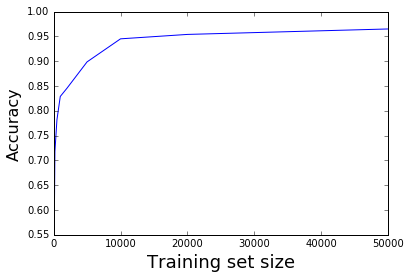

In [896]:
plt.plot(x,y)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)

In [898]:
20000/50

400.0

In [899]:
50000/400

125.0